# Tagged cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

$$\left(\frac{\sigma(e,e'\pi^+)}{\sigma(e,e'\pi^+)}\right)_{p_n>275 GeV/c}$$

last edit May-26 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

## (1) Load data

In [7]:
load_SIDIS_data( Nruns = 1,  do_e_e_pi=False)

Run number  6420 (1/1 runs)
Loaded 48  (e,e'π+n) events
retained 25  events with Pn > 275 MeV/c
Loaded 7  (e,e'π-n) events
retained 7  events with Pn > 275 MeV/c
Done loading files.

Total statistics:
25  (e,e'π+n) events
7  (e,e'π-n) events


## (2) Apply selection cuts not previously imposed

In [11]:


# ------------------------------------------------------------------------------------------------ #
def apply_further_selection_cuts_to_data(fdebug=2):#{
    '''
    e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts = apply_further_selection_cuts_to_data(fdebug=2)
    last edit May-26, 2022
    
    Apply selection cuts not previously imposed
    
    The cuts applied for (e,e'π) events:
    1. pi+/pi- acceptance matching cut in p-theta plane 
    2. Missing mass cut on (e,e'\pi) events
    
    The cuts applied for (e,e'πn) events:
    1. pi+/pi- acceptance matching cut in p-theta plane 
    
    '''
    global e_e_pi, e_e_pi_n, e_e_pi_GEMC
    global e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts
    
    
    # (e,e'\pi n) SIDIS data complete this -  need to add sector ID in the (e,e'\pi n) data 
    print('Applying selection cuts not previously imposed')
    
    # print number of events retained on every cut
    if fdebug < 1: return
    Nevents      = dict()
    frac_Nevents = dict()
    
    # (1) Data    
    print('(1) DATA')
    if (e_e_pi=={}) is False:#{
        print("(e,e'π)")
        
        # (e,e'\pi) SIDIS data
        e_e_pi_after_p_theta_cut = apply_p_theta_acceptance_cut( e_e_pi )
        e_e_pi_after_Mx_cut      = apply_Mx_cut( e_e_pi_after_p_theta_cut )
        e_e_pi_pass_cuts         = e_e_pi_after_Mx_cut;

        for pi_ch in pi_charge_names:#{
            print('(e,e',pi_ch,')')

            Nevents[pi_ch + ' original'] = len(e_e_pi[pi_ch])
            frac_Nevents[pi_ch + ' original'] = 1        
            print(Nevents[pi_ch + ' original'],'events before cut')    

            Nevents[pi_ch +' p-theta cut'] = len(e_e_pi_after_p_theta_cut[pi_ch])
            frac_Nevents[pi_ch + ' p-theta cut'] = float(Nevents[pi_ch +' p-theta cut'])/ Nevents[pi_ch + ' original']
            print(Nevents[pi_ch +' p-theta cut'],'events after p-theta cut (%.1f'%(100.*frac_Nevents[pi_ch + ' p-theta cut']),'%)')    


            Nevents[pi_ch +' Mx cut'] = len(e_e_pi_after_Mx_cut[pi_ch])
            frac_Nevents[pi_ch + ' Mx cut'] = float(Nevents[pi_ch +' Mx cut'])/Nevents[pi_ch + ' original']
            print(Nevents[pi_ch +' Mx cut'],'events after M_X cut (%.1f'%(100.*frac_Nevents[pi_ch + ' Mx cut']),'%)')
        #}
    #}
    if (e_e_pi_n=={}) is False:#{
        print("(e,e'πn)")
        
        # (e,e'\pi) SIDIS data
        e_e_pi_n_after_p_theta_cut = apply_p_theta_acceptance_cut( e_e_pi_n )
        e_e_pi_n_pass_cuts         = e_e_pi_n_after_p_theta_cut;

        for pi_ch in pi_charge_names:#{
            print('(e,e',pi_ch,')')

            Nevents[pi_ch + 'n original'] = len(e_e_pi_n[pi_ch])
            frac_Nevents[pi_ch + 'n original'] = 1        
            print(Nevents[pi_ch + 'n original'],'events before cut')    

            Nevents[pi_ch +'n p-theta cut'] = len(e_e_pi_n_after_p_theta_cut[pi_ch])
            frac_Nevents[pi_ch + 'n p-theta cut'] = float(Nevents[pi_ch +'n p-theta cut'])/ Nevents[pi_ch + 'n original']
            print(Nevents[pi_ch +'n p-theta cut'],'events after p-theta cut (%.1f'%(100.*frac_Nevents[pi_ch + 'n p-theta cut']),'%)')    
        #}
    #}
    
    # (2) MC
    if (e_e_pi_GEMC=={}) is False:#{
        print('(2) MC')
        
        # (e,e'\pi) - (uniform) MC for acceptance correction (uniform in e and \pi)
        e_e_pi_GEMC_after_eepi_cuts       = dict()

        # Apply (e,e'pi) SIDIS kinematical cuts while asking if pion was accepted, 
        # externally (here, and not in the CLAS12ROOT script) since we
        # want to retain and record also the events that did not pass these cuts, in the simulation
        # whereas in data we just omit events that did not pass these cuts
        for pi_ch in pi_charge_names:#{
            e_e_pi_GEMC_after_eepi_cuts[pi_ch] = e_e_pi_GEMC[pi_ch][(e_e_pi_GEMC[pi_ch].pi_passed_cuts==1) & (e_e_pi_GEMC[pi_ch].eepiPastKinematicalCuts==1)];
        #}
        e_e_pi_GEMC_after_p_theta_cut = apply_p_theta_acceptance_cut( e_e_pi_GEMC_after_eepi_cuts )
        e_e_pi_GEMC_after_Mx_cut      = apply_Mx_cut(  e_e_pi_GEMC_after_p_theta_cut )
        e_e_pi_GEMC_pass_cuts         = e_e_pi_GEMC_after_Mx_cut;


        
        # print number of events retained on every cut in the uniform GEMC
        if fdebug<2: return
        for pi_ch in pi_charge_names:#{
            print('(e,e',pi_ch,') in uniform GEMC simulation')

            Nevents[pi_ch + ' GEMC original'] = len(e_e_pi_GEMC[pi_ch])
            frac_Nevents[pi_ch + ' GEMC original'] = 1        
            print(Nevents[pi_ch + ' GEMC original'],'events before cut')    

            Nevents[pi_ch +' GEMC p-theta cut'] = len(e_e_pi_GEMC_after_p_theta_cut[pi_ch])
            frac_Nevents[pi_ch + ' GEMC p-theta cut'] = float(Nevents[pi_ch +' GEMC p-theta cut'])/ Nevents[pi_ch + ' GEMC original']
            print(Nevents[pi_ch +' GEMC p-theta cut'],'events after p-theta cut (%.1f'%(100.*frac_Nevents[pi_ch + ' GEMC p-theta cut']),'%)')    


            Nevents[pi_ch +' GEMC Mx cut'] = len(e_e_pi_GEMC_after_Mx_cut[pi_ch])
            frac_Nevents[pi_ch + ' GEMC Mx cut'] = float(Nevents[pi_ch +' GEMC Mx cut'])/Nevents[pi_ch + ' GEMC original']
            print(Nevents[pi_ch +' GEMC Mx cut'],'events after M_X cut (%.1f'%(100.*frac_Nevents[pi_ch + ' GEMC Mx cut']),'%)')
        #}        
    #}
    print('Done applying selection cuts not previously imposed')
    return e_e_pi_pass_cuts, e_e_pi_n_pass_cuts, e_e_pi_GEMC_pass_cuts
#}
# ------------------------------------------------------------------------------------------------ #




In [12]:
_,e_e_pi_n_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=2);

Applying selection cuts not previously imposed
(1) DATA
(e,e'πn)
Apply a π+/π- acceptance matching cut on the in p-	heta plane
(e,e piplus )
25 events before cut
14 events after p-theta cut (56.0 %)
(e,e piminus )
7 events before cut
5 events after p-theta cut (71.4 %)
Done applying selection cuts not previously imposed


## (3) Extract cross-section ratio as a function of Bjorken $x$
For a moving proton $x'$, defined as
$ x' = Q^2/((W')^2 - m_N^2 + Q^2)$

In [12]:
x_bins= np.linspace(0.2,0.6,10) #np.concatenate([np.linspace(0.2,0.45,6), np.linspace(0.5,0.75,8) ])
x     = (x_bins[1:] + x_bins[:-1])/2
x_bins

array([0.2       , 0.24444444, 0.28888889, 0.33333333, 0.37777778,
       0.42222222, 0.46666667, 0.51111111, 0.55555556, 0.6       ])

In [ ]:
var_e_e_pi      = 'xB'
xlabel_e_e_pi   = "Bjorken $x$"

# var_e_e_pi_n    = 'xB'
var_e_e_pi_n    = 'xPrime2'

if var_e_e_pi_n == 'xB':
    
    xlabel_e_e_pi_n = "Bjorken $x$"
    SuperRatio_label= "$(x/x)$"

elif var_e_e_pi_n == 'xPrime2':
        
    # xlabel_e_e_pi_n = "$x' = Q^2/2\cdot((m_d - E_s)\omega + p_n \cdot q)$"
    xlabel_e_e_pi_n = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"
    SuperRatio_label= "$(x'/x)$"
    

# Accumulated data from 101 runs of 10.2 GeV

### load data

In [10]:
runs_filename = "/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/macros/runlists/good_runs_10-2.txt"

# Using readlines()
runs_file     = open(runs_filename, 'r')
run_fileLines = runs_file.readlines()
runs = []
for line in run_fileLines:#{
    run = int(line.strip())
    runs.append(run)
runs = np.array(runs)
runs

array([6420, 6421, 6422, 6426, 6428, 6429, 6430, 6431, 6432, 6433, 6437,
       6442, 6443, 6444, 6445, 6449, 6450, 6451, 6452, 6453, 6454, 6455,
       6456, 6457, 6458, 6461, 6462, 6463, 6464, 6465, 6466, 6467, 6468,
       6470, 6472, 6473, 6474, 6475, 6476, 6479, 6481, 6482, 6483, 6484,
       6485, 6486, 6488, 6489, 6491, 6492, 6498, 6499, 6501, 6502, 6510,
       6511, 6512, 6513, 6514, 6516, 6522, 6523, 6524, 6525, 6546, 6547,
       6548, 6549, 6550, 6557, 6558, 6559, 6560, 6562, 6563, 6565, 6566,
       6567, 6568, 6569, 6570, 6571, 6572, 6573, 6576, 6577, 6578, 6581,
       6582, 6585, 6586, 6587, 6589, 6590, 6591, 6592, 6593, 6595, 6596,
       6597, 6598])

In [11]:
fdebug   = 1
e_e_pi   = dict()
e_e_pi_n = dict()
for runnum,runIdx in zip(runs,range(len(runs))):
    for pi_charge_name in pi_charge_names:
        eepi   = pd.read_csv(e_e_pi_data_path 
                                           +'skimmed_SIDIS_inc_00%d_e_%s_selected_eepi_kinematics.csv'%(runnum,pi_charge_name))
        eepin = pd.read_csv(e_e_pi_n_data_path 
                                           +'skimmed_SIDIS_and_BAND_inc_00%d_e_%s_n.csv'%(runnum,pi_charge_name))        

        if fdebug>1: print('loaded',len(eepi),'(e,e',pi_charge_name,                  
                           ') events and ',
                           len(eepin),'(e,e',pi_charge_name,'n), events')    
    
        # large momentum neutrons ( Pn > 275 MeV/c)
        eepin = eepin[eepin['n_P']>0.275]
        if fdebug>2: print('retained',len(eepin),'(e,e',pi_charge_name,'n), events')            
        
        if runIdx==0:             
            e_e_pi[pi_charge_name]   = eepi
            e_e_pi_n[pi_charge_name] = eepin
        else:
            e_e_pi[pi_charge_name]   = pd.concat([e_e_pi[pi_charge_name],  eepi ])
            e_e_pi_n[pi_charge_name] = pd.concat([e_e_pi_n[pi_charge_name],eepin])
    print('loaded file %d/%d files'%(runIdx,len(runs)))

loaded file 0/101 files
loaded file 1/101 files
loaded file 2/101 files
loaded file 3/101 files
loaded file 4/101 files
loaded file 5/101 files
loaded file 6/101 files
loaded file 7/101 files
loaded file 8/101 files
loaded file 9/101 files
loaded file 10/101 files
loaded file 11/101 files
loaded file 12/101 files
loaded file 13/101 files
loaded file 14/101 files
loaded file 15/101 files
loaded file 16/101 files
loaded file 17/101 files
loaded file 18/101 files
loaded file 19/101 files
loaded file 20/101 files
loaded file 21/101 files
loaded file 22/101 files
loaded file 23/101 files
loaded file 24/101 files
loaded file 25/101 files
loaded file 26/101 files
loaded file 27/101 files
loaded file 28/101 files
loaded file 29/101 files
loaded file 30/101 files
loaded file 31/101 files
loaded file 32/101 files
loaded file 33/101 files
loaded file 34/101 files
loaded file 35/101 files
loaded file 36/101 files
loaded file 37/101 files
loaded file 38/101 files
loaded file 39/101 files
loaded fil

### Statistics

In [45]:
for df_label,df_dict,is_eepi in zip(["(e,e'\pi)","(e,e'\pi n)"],
                                    [e_e_pi,e_e_pi_n],
                                    [True,False]):
    df_pips = df_dict['piplus']
    df_pims = df_dict['piminus']
    # cut on z
    df_pips = df_pips[ (theta_min<df_pips.pi_Theta*r2d) & (df_pips.pi_Theta*r2d<theta_max) ]
    df_pims = df_pims[ (theta_min< df_pims.pi_Theta*r2d) & (df_pims.pi_Theta*r2d < theta_max)]

    # and cut on Mx if its (e,e'pi)
    if is_eepi:#{
        df_pips = df_pips[ (Mx_min < df_pips.M_X) & (df_pips.M_X < Mx_max)]    
        df_pims = df_pims[ (Mx_min < df_pims.M_X) & (df_pims.M_X < Mx_max)]
    #}

    print(df_label)
    print(len(df_pips),'pi+ events')
    print(len(df_pims),'pi- events')
    print('')

(e,e'\pi)
7572352 pi+ events
4283691 pi- events

(e,e'\pi n)
469 pi+ events
177 pi- events



## Super - ratio: the number of events in each sample

### super ratio as a function of $x_B$

In [14]:
R_e_e_pi_pips_to_pims, R_e_e_pi_pips_to_pims_errup, R_e_e_pi_pips_to_pims_errdw       = compute_ratio_pips_to_pims(df_dict=e_e_pi  , var=var_e_e_pi,  bins=x_bins, 
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=True)
R_e_e_pi_n_pips_to_pims, R_e_e_pi_n_pips_to_pims_errup, R_e_e_pi_n_pips_to_pims_errdw = compute_ratio_pips_to_pims(df_dict=e_e_pi_n, var=var_e_e_pi_n, bins=x_bins,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=False)

SuperR     = R_e_e_pi_n_pips_to_pims / R_e_e_pi_pips_to_pims
SuperR_errup = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errup/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errup  /R_e_e_pi_pips_to_pims) ) 
SuperR_errdw = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errdw/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errdw  /R_e_e_pi_pips_to_pims) ) 

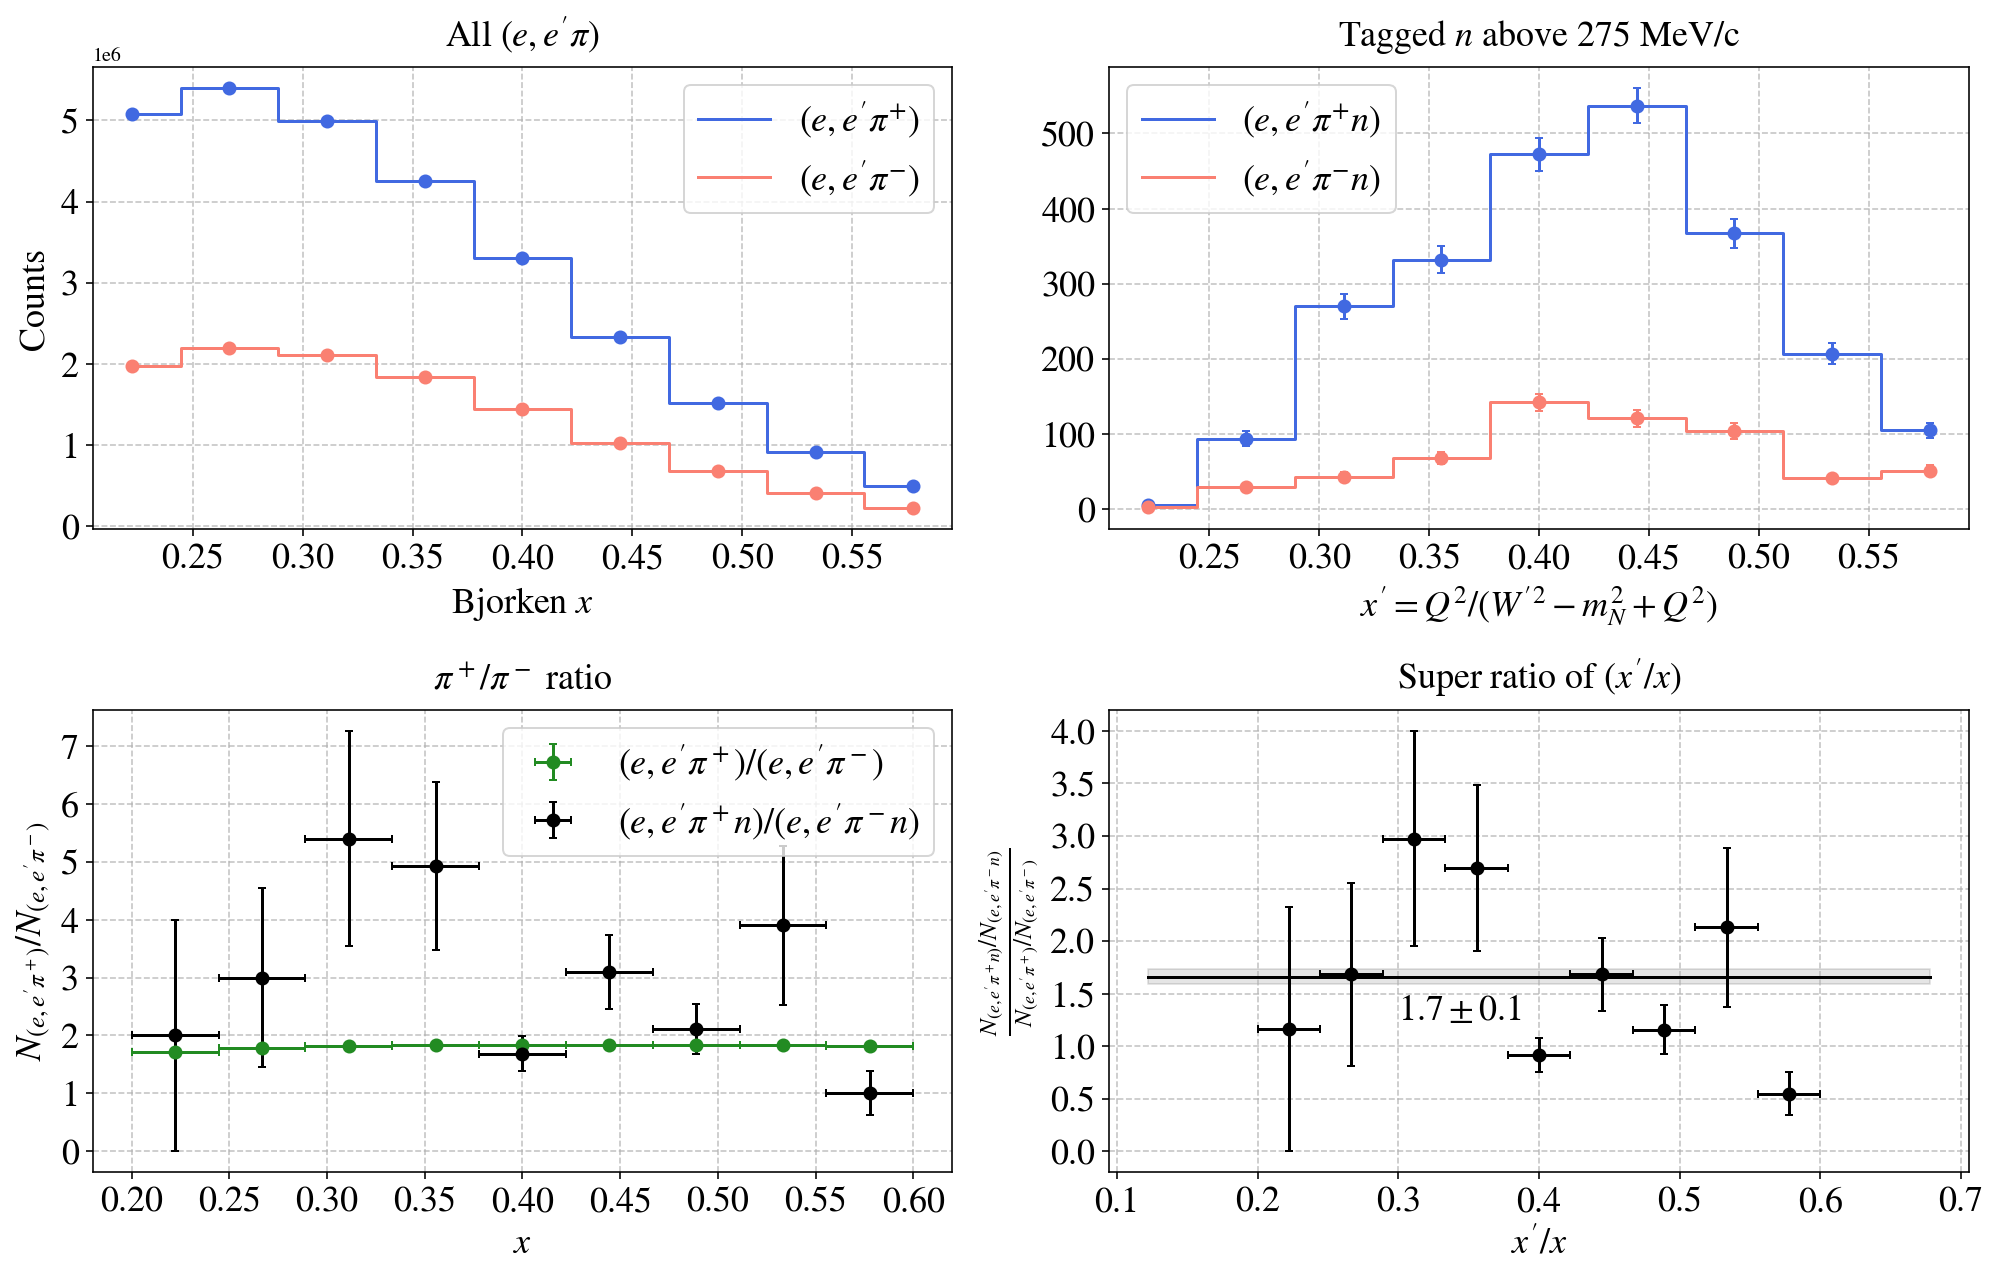

In [15]:
h = dict()

fig = plt.figure(figsize=(14,9))
ax  = fig.add_subplot(2,2,1)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name],x_err= plot_step_hist(df=e_e_pi[pi_charge_name], var=var_e_e_pi, bins=x_bins , label="$(e,e'"+pi_label+")$" )
set_axes(ax,xlabel_e_e_pi,'Counts',title="All $(e,e'\pi)$",do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,2)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    x,h[pi_charge_name + 'n'],x_err = plot_step_hist(df=e_e_pi_n[pi_charge_name], var=var_e_e_pi_n, bins=x_bins , label="$(e,e'"+pi_label+"n)$" )
set_axes(ax,xlabel_e_e_pi_n,'',title='Tagged $n$ above 275 MeV/c',do_add_grid=True, do_add_legend=True, fontsize=fontsize)

ax  = fig.add_subplot(2,2,3)
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_pips_to_pims, 
            yerr=[R_e_e_pi_pips_to_pims_errdw,R_e_e_pi_pips_to_pims_errup] ,
            marker='o', linestyle='None',
            capsize=2,
            color='forestgreen',label="$(e,e'\pi^+)/(e,e'\pi^-)$")
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_n_pips_to_pims, 
            yerr=[R_e_e_pi_n_pips_to_pims_errdw,R_e_e_pi_n_pips_to_pims_errup] , 
            marker='o', linestyle='None',
            capsize=2 ,
            color='black',label="$(e,e'\pi^+n)/(e,e'\pi^-n)$")

set_axes(ax,'$x$',"$N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}$",
                     title='$\pi^+/\pi^-$ ratio',
         do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,4)
l=ax.errorbar( x=x, xerr=x_err, y=SuperR, 
            yerr=[SuperR_errdw,SuperR_errup],
            marker='o', linestyle='None',             
            capsize=2,
            color='black')
# fit to constant
p,cov = np.polyfit(x=x,y=SuperR,deg=0,cov=True)
Const_SuperR,dConst_SuperR = p[0],cov[0,0]        
x_fit = np.linspace(np.min(x)-0.1,np.max(x)+0.1,100)
y_dw = (Const_SuperR - dConst_SuperR)*np.ones(len(x_fit))
y_up = (Const_SuperR + dConst_SuperR)*np.ones(len(x_fit))
ax.plot( x_fit, Const_SuperR*np.ones(len(x_fit)) , color=l[0].get_color())
ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
plt.text( 0.3, 1.25 ,'$%.1f\pm%.1f$'%(Const_SuperR,dConst_SuperR),fontsize=18)


set_axes(ax,"$x'/x$",
         "$\\frac{N_{(e,e'\pi^+n)}/N_{(e,e'\pi^-n)}}{N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}}$",
         title="Super ratio of " + SuperRatio_label,
         do_add_grid=True, fontsize=fontsize)

plt.tight_layout()

#### Reproduce the same plot for an intermediate range in $z$
$0.3<z<0.6$

In [16]:
z_min = 0.3
z_max = 0.6

In [17]:
R_e_e_pi_pips_to_pims, R_e_e_pi_pips_to_pims_errup, R_e_e_pi_pips_to_pims_errdw       = compute_ratio_pips_to_pims(df_dict=e_e_pi  , var=var_e_e_pi,  bins=x_bins, 
                                                                                                                   z_min=z_min, z_max=z_max,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=True)
R_e_e_pi_n_pips_to_pims, R_e_e_pi_n_pips_to_pims_errup, R_e_e_pi_n_pips_to_pims_errdw = compute_ratio_pips_to_pims(df_dict=e_e_pi_n, var=var_e_e_pi_n, bins=x_bins,
                                                                                                                   z_min=z_min, z_max=z_max,
                                                                                                                   theta_min=theta_min, theta_max=theta_max,                                                                                                                 
                                                                                                                   Mx_min=Mx_min, Mx_max=Mx_max, is_eepi=False)

SuperR     = R_e_e_pi_n_pips_to_pims / R_e_e_pi_pips_to_pims
SuperR_errup = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errup/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errup  /R_e_e_pi_pips_to_pims) ) 
SuperR_errdw = SuperR * np.sqrt( np.square(R_e_e_pi_n_pips_to_pims_errdw/R_e_e_pi_n_pips_to_pims)+                                                                                          
                                np.square(R_e_e_pi_pips_to_pims_errdw  /R_e_e_pi_pips_to_pims) ) 

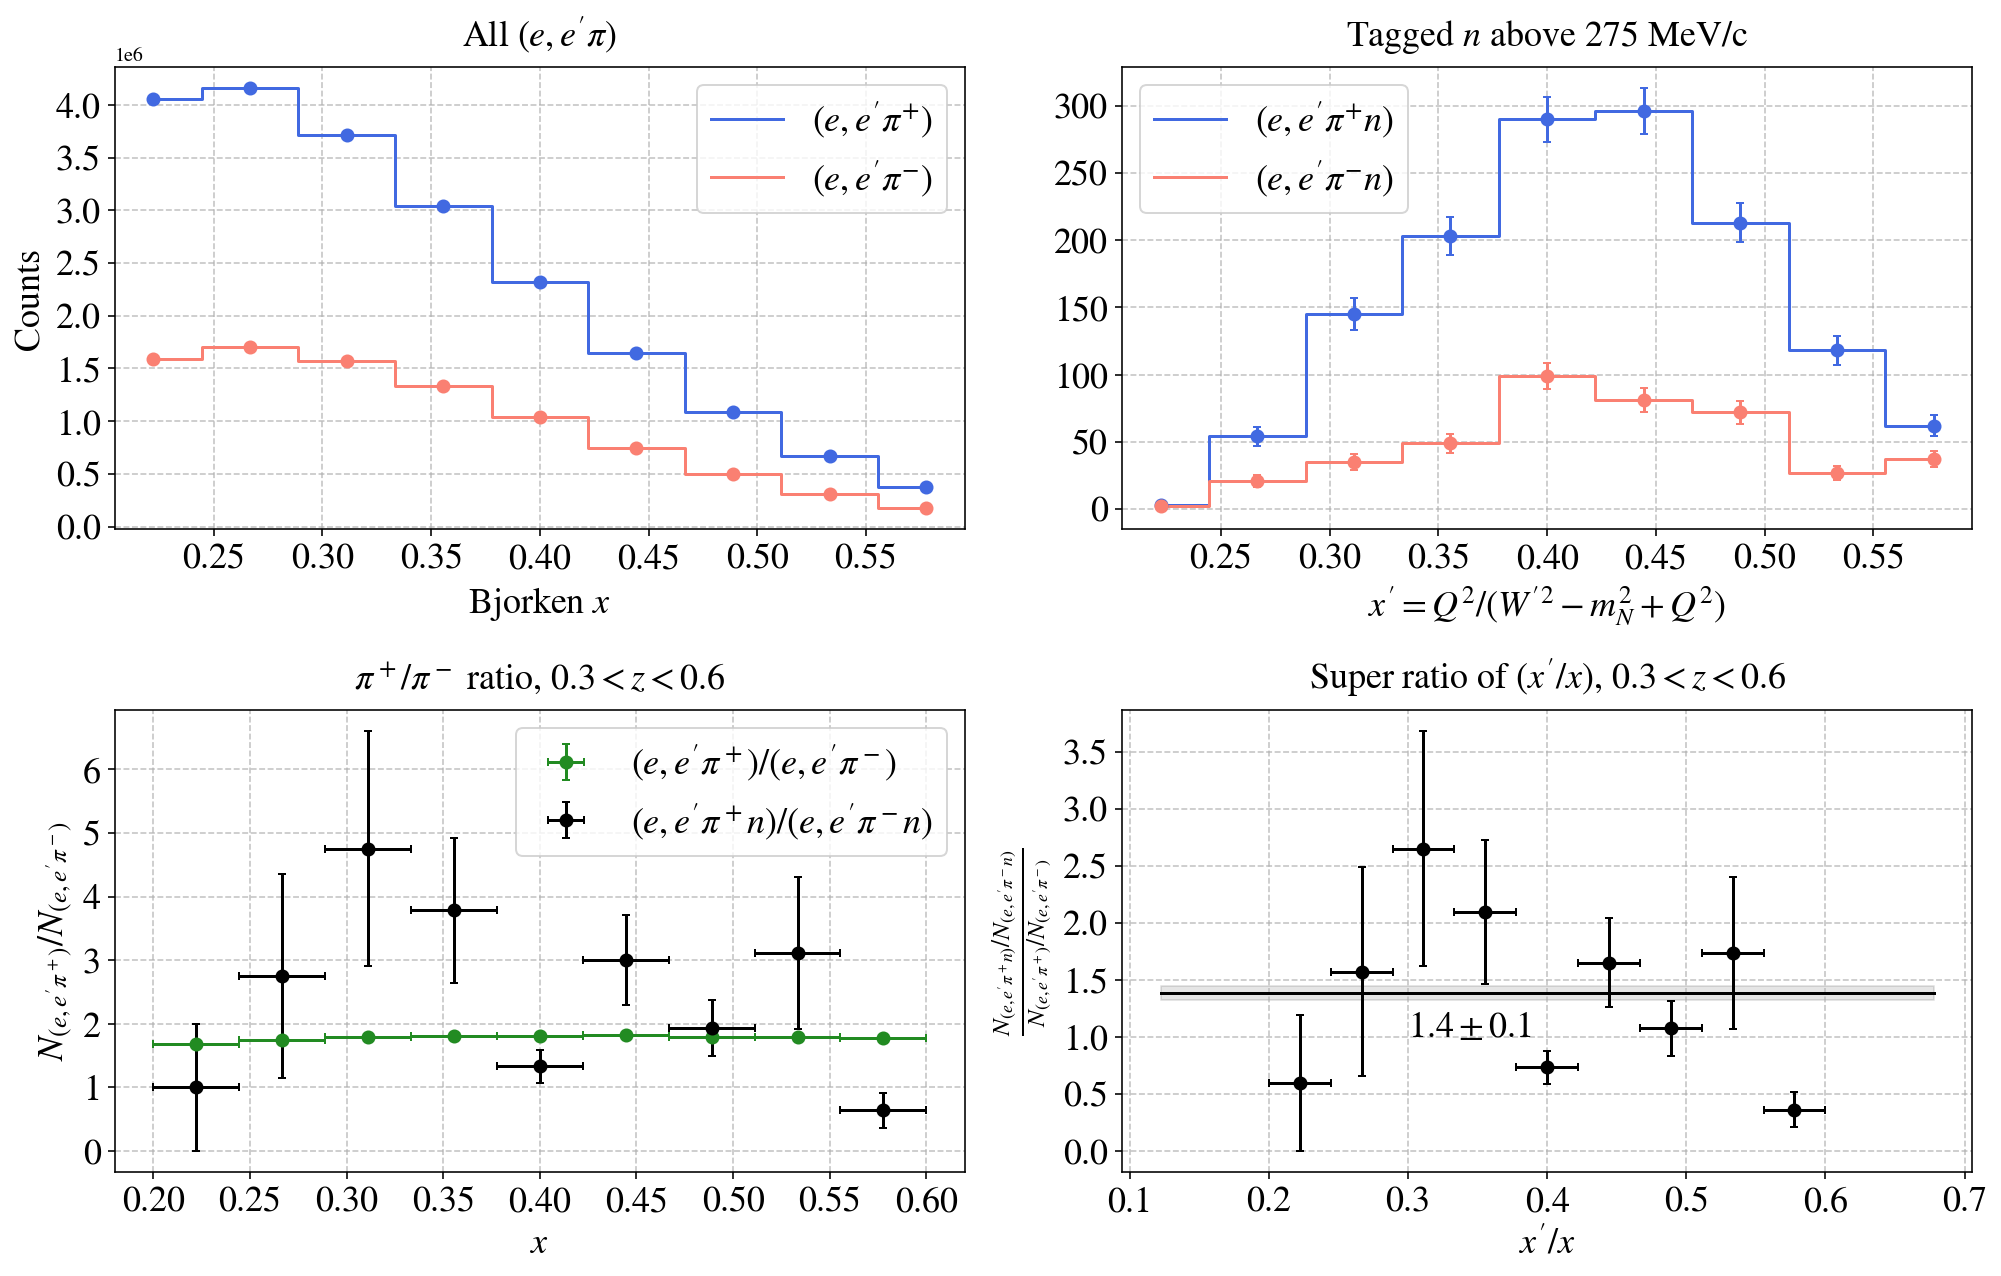

In [18]:
h = dict()

fig = plt.figure(figsize=(14,9))
ax  = fig.add_subplot(2,2,1)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    df = e_e_pi[pi_charge_name]
    df = df[(z_min < df.Zpi)&(df.Zpi<z_max)]
    x,h[pi_charge_name],x_err= plot_step_hist(df=df, 
                                              var=var_e_e_pi, bins=x_bins , label="$(e,e'"+pi_label+")$" )
set_axes(ax,xlabel_e_e_pi,'Counts',title="All $(e,e'\pi)$",do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,2)
for pi_charge_name,pi_color,pi_label in zip(pi_charge_names,pi_colors,pi_labels):
    df = e_e_pi_n[pi_charge_name]
    df = df[(z_min < df.Zpi)&(df.Zpi<z_max)]
    x,h[pi_charge_name + 'n'],x_err = plot_step_hist(df=df,
                                                     var=var_e_e_pi_n, bins=x_bins , label="$(e,e'"+pi_label+"n)$" )
set_axes(ax,xlabel_e_e_pi_n,'',title='Tagged $n$ above 275 MeV/c',do_add_grid=True, do_add_legend=True, fontsize=fontsize)

ax  = fig.add_subplot(2,2,3)
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_pips_to_pims, 
            yerr=[R_e_e_pi_pips_to_pims_errdw,R_e_e_pi_pips_to_pims_errup] ,
            marker='o', linestyle='None',
            capsize=2,
            color='forestgreen',label="$(e,e'\pi^+)/(e,e'\pi^-)$")
ax.errorbar( x=x, xerr=x_err, y=R_e_e_pi_n_pips_to_pims, 
            yerr=[R_e_e_pi_n_pips_to_pims_errdw,R_e_e_pi_n_pips_to_pims_errup] , 
            marker='o', linestyle='None',
            capsize=2 ,
            color='black',label="$(e,e'\pi^+n)/(e,e'\pi^-n)$")

set_axes(ax,'$x$',"$N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}$",
                     title='$\pi^+/\pi^-$ ratio'+ ", $%.1f<z<%.1f$"%(z_min,z_max),
         do_add_grid=True, do_add_legend=True, fontsize=fontsize)


ax  = fig.add_subplot(2,2,4)
l=ax.errorbar( x=x, xerr=x_err, y=SuperR, 
            yerr=[SuperR_errdw,SuperR_errup],
            marker='o', linestyle='None',             
            capsize=2,
            color='black')
# fit to constant
p,cov = np.polyfit(x=x,y=SuperR,deg=0,cov=True)
Const_SuperR,dConst_SuperR = p[0],cov[0,0]        
x_fit = np.linspace(np.min(x)-0.1,np.max(x)+0.1,100)
y_dw = (Const_SuperR - dConst_SuperR)*np.ones(len(x_fit))
y_up = (Const_SuperR + dConst_SuperR)*np.ones(len(x_fit))
ax.plot( x_fit, Const_SuperR*np.ones(len(x_fit)) , color=l[0].get_color())
ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
plt.text( 0.3, 1. ,'$%.1f\pm%.1f$'%(Const_SuperR,dConst_SuperR),fontsize=18)


set_axes(ax,"$x'/x$",
         "$\\frac{N_{(e,e'\pi^+n)}/N_{(e,e'\pi^-n)}}{N_{(e,e'\pi^+)}/N_{(e,e'\pi^-)}}$",
         title="Super ratio of " + SuperRatio_label + ", $%.1f<z<%.1f$"%(z_min,z_max),
         do_add_grid=True, fontsize=fontsize)

plt.tight_layout()

## Now repeat the same for with a tagged neutron , i.e. $(e,e'\pi^{\pm} n)$ events
as a function of $x'$

In [25]:
z_bins   = [0.4,0.5,0.75]
z_widths = [0.1,0.1,0.15]
x_bins   = np.linspace(0.2,0.6,5)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
var_e_e_pi_n    = 'xPrime2'
xlabel_e_e_pi_n = "$x' = Q^2/(W'^2 - m_N^2 + Q^2)$"

In [26]:
Rpips2pims_n, Rpips2pims_n_errup, Rpips2pims_n_errdw = dict(), dict(), dict()
Y, dY = dict(),dict()
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width,z_bin+z_width
    (Rpips2pims_n[z_bin],
     Rpips2pims_n_errup[z_bin], 
     Rpips2pims_n_errdw[z_bin]) = compute_ratio_pips_to_pims(df_dict=e_e_pi_n  , 
                                                             var=var_e_e_pi_n, 
                                                             bins=x_bins, 
                                                             z_min=z_min,z_max=z_max, 
                                                             theta_min=theta_min,
                                                             theta_max=theta_max, 
                                                             is_eepi=False)

    # fit to a constant 
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    p,cov = np.polyfit(x,y,deg=0,cov=True)
    Y[z_bin],dY[z_bin] = p[0],cov[0,0]

    # print(z_bin,Rpips2pims_n[z_bin],Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
print('done') 

done


### plot, and fit to a constant

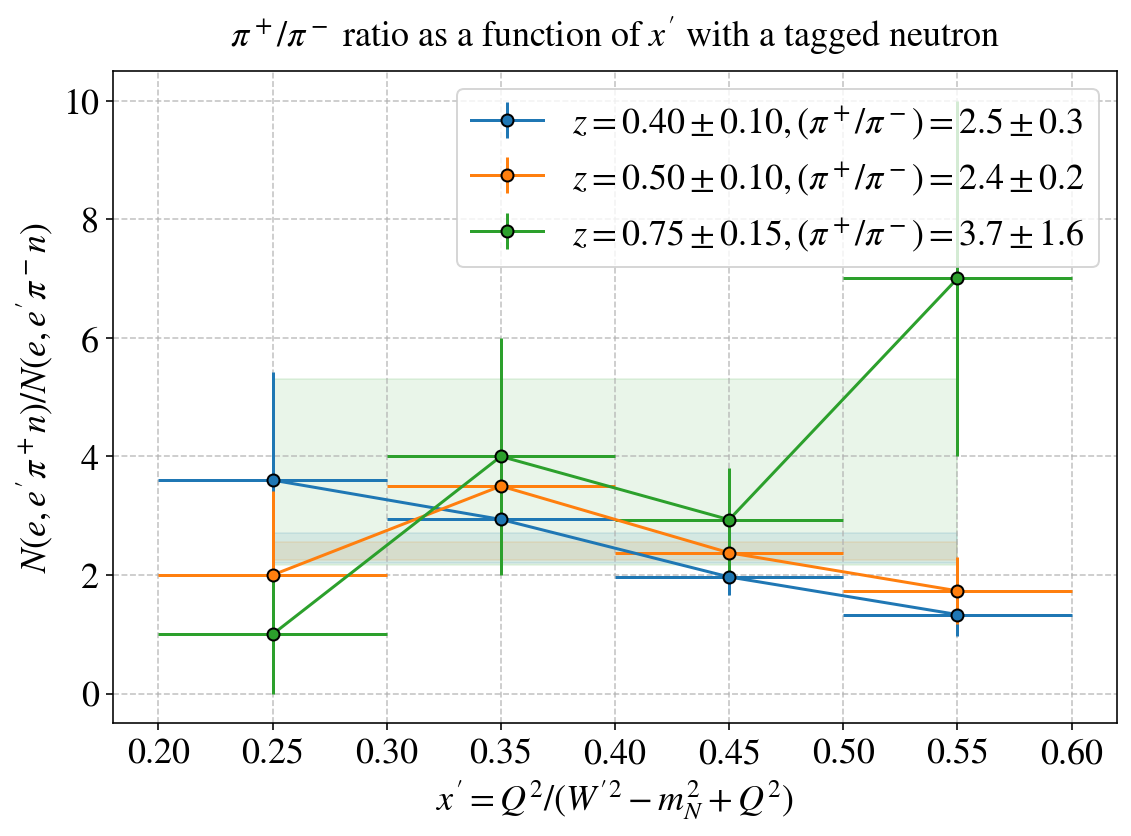

In [27]:
fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):
    y    = Rpips2pims_n[z_bin]
    y_err= (Rpips2pims_n_errup[z_bin],Rpips2pims_n_errdw[z_bin])
    x_fit = np.linspace(np.min(x),np.max(x),100)
    y_dw = (Y[z_bin]-dY[z_bin])*np.ones(len(x_fit))
    y_up = (Y[z_bin]+dY[z_bin])*np.ones(len(x_fit))

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=y, yerr=y_err,
                marker='o',markeredgecolor='k',
                label='$z=%.2f\pm%.2f, (\pi^+/\pi^-)=%.1f\pm%.1f$'%(z_bin,z_width,Y[z_bin],dY[z_bin]))
    
    ax.fill_between( x_fit, y_dw, y_up, color=l[0].get_color(), alpha=0.1)
set_axes(ax,xlabel_e_e_pi_n,"$N(e,e'\pi^+n)/N(e,e'\pi^-n)$",
         title="$\pi^+/\pi^-$ ratio as a function of $x'$ with a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=fontsize,
        );